# Project: Wrangling and Analyze Data

In [1]:
# import the necessary python packages
import json
import os
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tweepy
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
consumer_key = os.getenv("API_KEY")
consumer_secret = os.getenv("API_KEY_SECRET")
access_token = os.getenv("ACCESS_TOKEN")
access_secret = os.getenv("ACCESS_TOKEN_SECRET")

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

## Data Gathering


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# load WeRateDogs Archive data from csv file
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# load image prediction data from the url provided in the course
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open (url.split('/')[-1], mode = 'wb') as f:
    f.write(response.content)

# read the file into a pandas dataframe
image_df = pd.read_csv("image-predictions.tsv", sep = '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [19]:
# iterate throught the twitter dataset to get each tweet id
for _, item in twitter_df.iterrows():
    try:
        start = timer()
        tweet_id = item['tweet_id']

        # get additional data from twitter api
        tweet = api.get_status(tweet_id, tweet_mode='extended')

        # write data to tweet_json.txt file
        file_name = 'tweet_json.txt'
        if os.path.exists(file_name):
            with open (file_name, mode = 'a') as f:
                f.write(json.dumps(tweet._json) + '\n')
        else:
            with open (file_name, mode = 'wt') as f:
                f.write(json.dumps(tweet._json) + '\n')
        print(tweet_id)
        end = timer()
        print(end-start)
    except Exception as e:
        print(e)
        

892420643555336193
1.0032949000014924
892177421306343426
0.8538344999997207
891815181378084864
0.8386353999994753
891689557279858688
0.9305698999996821
891327558926688256
0.8441781999990781
891087950875897856
0.8361769000002823
890971913173991426
0.9306902999996964
890729181411237888
0.865674200000285
890609185150312448
0.909916599999633
890240255349198849
0.9535254999991594
890006608113172480
0.9065468999997393
889880896479866881
1.1991505999994843
889665388333682689
0.9237266999989515
889638837579907072
0.7930362000006426
889531135344209921
0.8873801000008825
889278841981685760
0.9106092000001809
888917238123831296
0.8875213999999687
888804989199671297
0.8462213000002521
888554962724278272
0.845311799999763
404 Not Found
144 - No status found with that ID.
888078434458587136
0.8091172999993432
887705289381826560
0.7749834999995073
887517139158093824
0.9329135000007227
887473957103951883
0.8690817999995488
887343217045368832
0.8883797999988019
887101392804085760
0.7975178000015148
886

Rate limit reached. Sleeping for: 54


758740312047005698
56.33638539999993
758474966123810816
0.9938607000003685
758467244762497024
0.9050688999996055
758405701903519748
1.0252626000001328
758355060040593408
0.9364807000001747
758099635764359168
0.8295294999988982
758041019896193024
0.9921796999988146
757741869644341248
0.8349670000006881
757729163776290825
0.9032330000009097
757725642876129280
0.8714376999996603
757611664640446465
1.3107063999996171
757597904299253760
0.8774312000005011
757596066325864448
0.9361851000012393
757400162377592832
1.185417700000471
757393109802180609
0.9760975999997754
757354760399941633
1.0338198999997985
756998049151549440
0.8843180000003485
756939218950160384
0.8964135000005626
756651752796094464
0.8795258999998623
756526248105566208
0.7681695999999647
756303284449767430
0.9561874000009993
756288534030475264
0.9174968999996054
756275833623502848
1.9417382999999973
755955933503782912
0.8625830999990285
755206590534418437
0.877396799998678
755110668769038337
0.9274244999996881
754874841593970

In [5]:
tweets = []

# read data from tweet_json.txt file to a list of dictionaries
with open('tweet_json.txt','r') as file:
    for line in file:
        # convert json strings to dictionaries
        data = json.loads(line)
        # append the dictionaries to the tweets list
        tweets.append({k:v for (k,v) in data.items() if k in ('id','retweet_count','favorite_count')})

print(tweets[0])

{'id': 892420643555336193, 'retweet_count': 7054, 'favorite_count': 33936}


In [6]:
# write the list of dictionaries to a dataframe
tweepy_df = pd.DataFrame(tweets)
tweepy_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7054,33936
1,892177421306343426,5329,29420
2,891815181378084864,3503,22136
3,891689557279858688,7262,37057
4,891327558926688256,7804,35425


In [7]:
tweepy_df.rename({'id':'tweet_id'}, axis=1, inplace=True)
tweepy_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7054,33936
1,892177421306343426,5329,29420
2,891815181378084864,3503,22136
3,891689557279858688,7262,37057
4,891327558926688256,7804,35425


## Assessing the Data

### Assesing the datasets visually

In [8]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
tweepy_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7054,33936
1,892177421306343426,5329,29420
2,891815181378084864,3503,22136
3,891689557279858688,7262,37057
4,891327558926688256,7804,35425
...,...,...,...
2236,666049248165822465,37,89
2237,666044226329800704,116,247
2238,666033412701032449,36,100
2239,666029285002620928,39,112


Scrolling through the three datasets, the following quality issues can be observed:
* `twitter_df`: 
    * About 5 columns (`in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp`) seem t have completely null values
    * The `source` column still carries the html anchor tag instead of just the url
    * The `name` column contains wrong names for some of the dogs. An example is the record in index `2352`
    * Some other columns asides the ones listed above are null but instead of `NaN`, we have 'None'. This might make working with null data difficult as we continue our analysis
* `image_df`:
    * the case of the predictions is not consistent. Some are lower case while some others are title case


As for tidiness, the `twitter_df` and `tweepy_df` have more rows than the `image_df`. This means some tweets don't have image predictions and might have to be dropped. Also, the `twitter_df` contains both information about the tweets and the type of dog. The type of dog should be contained in a separate dataset. 

### Assessing the datasets programmatically

In [11]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
twitter_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1266,709852847387627521,NaN,NaN,2016-03-15 21:24:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,12,10,None,None,None,None,None
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,None,None,None,pupper,None
636,793500921481273345,NaN,NaN,2016-11-01 17:12:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an extremely mediocre cop...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793500921...,12,10,Fiona,None,None,None,None
484,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,None,None,None,None
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
2075,670840546554966016,NaN,NaN,2015-11-29 05:43:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Colby. He's that one cool friend that get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
346,831926988323639298,8.319030e+17,20683724.0,2017-02-15 18:03:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@UNC can confirm 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
1903,674638615994089473,NaN,NaN,2015-12-09 17:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper is fed up with being tickled. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674638615...,12,10,None,None,None,pupper,None


In [13]:
twitter_df[['text','name']].sample(10)

,text,name
2068,Me running from commitment. 10/10 https://t.co...,None
2299,Here we have a Hufflepuff. Loves vest. Eyes wi...,None
820,Meet Al Cabone. He's a gangsta puppa. Rather h...,Al
1890,This pup was carefully tossed to make it look ...,None
1254,Here's a brigade of puppers. All look very pre...,None
417,This is Paisley. She really wanted to be presi...,Paisley
2208,This is Maks. Maks just noticed something wasn...,Maks
2294,Extremely intelligent dog here. Has learned to...,None
574,RT @dog_rates: This is Anakin. He strives to r...,Anakin
2323,Here we have an Austrian Pulitzer. Collectors ...,None


In [14]:
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter_df[twitter_df['retweeted_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [15]:
twitter_df[twitter_df['in_reply_to_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [16]:
twitter_df.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chester. He's a Benefloof Cumberbark. ...,NaN,NaN,2017-02-17 03:39:51 +0000,https://twitter.com/dog_rates/status/683391852...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [17]:
twitter_df.duplicated().sum()

0

In [18]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
898,699779630832685056,https://pbs.twimg.com/media/CbYd3C9WEAErJ4Z.jpg,1,malinois,0.706038,True,German_shepherd,0.165655,True,Great_Dane,0.059048,True
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
99,667773195014021121,https://pbs.twimg.com/media/CURoLrOVEAAaWdR.jpg,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
2037,884562892145688576,https://pbs.twimg.com/media/DEaZQkfXUAEC7qB.jpg,1,pug,0.546406,True,French_bulldog,0.404291,True,Brabancon_griffon,0.044002,True
1144,730211855403241472,https://pbs.twimg.com/media/CiI7zVZUoAEzGW7.jpg,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1811,832998151111966721,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,0.539036,True,French_bulldog,0.317617,True,bull_mastiff,0.093928,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True


In [20]:
image_df.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [21]:
image_df.duplicated().sum()

0

In [22]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2241 non-null   int64
 1   retweet_count   2241 non-null   int64
 2   favorite_count  2241 non-null   int64
dtypes: int64(3)
memory usage: 52.6 KB


In [23]:
tweepy_df.sample(10)

,tweet_id,retweet_count,favorite_count
1490,690932576555528194,915,3050
818,766714921925144576,351,2475
483,813096984823349248,3413,10067
1817,675822767435051008,481,1387
374,826115272272650244,2886,14795
2016,670086499208155136,221,622
2226,666094000022159362,64,143
1483,691416866452082688,6966,17951
211,849668094696017920,4480,0
1550,687317306314240000,8406,18745


In [24]:
tweepy_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.241000e+03,2241.000000,2241.000000
mean,7.444641e+17,2554.356537,7289.521196
std,6.810133e+16,4271.253799,11150.113243
min,6.660209e+17,1.000000,0.000000
25%,6.807985e+17,523.000000,1348.000000
50%,7.268871e+17,1233.000000,3205.000000
75%,8.004593e+17,2947.000000,9025.000000
max,8.924206e+17,71159.000000,145417.000000


In [25]:
tweepy_df.duplicated().sum()

0

Assessing the datasets programmatically, the following quality issues can be highlighted from the `twitter_df`:
* the 5 columns mentioned earlier are not completely null but about 90% of the records are null.
* The `source` column carries the html anchor tag instead of just the tweet source.
* pandas does not recognize the missing values in the `doggo, floofer, pupper` and `puppo` columns because 'None' is used instead of `NaN`.
* the records with non-null values in the `retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` columns seem to be retweets and not original tweets.
* The `timestamp` and `retweeted_status_timestamp` columns have their datatypes as `object` rather than `datetime64[ns]`.
* The `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id` and `retweeted_status_user_id` columns have their datatypes as `float64` rather than `int64`.

#### In summary, the following data cleaning issues have been identified after assessing the data:
##### Quality Issues

1. The records with non-null values in the `retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` columns are retweets and not original tweets.
2. The records with non-null values in the `in_reply_to_status_id` and `in_reply_to_user_id` columns are replies and not original tweets.
3. The `source` column carries the html anchor tag instead of just the tweet source.
4. The `name` column contains wrong names for some of the dogs. An example is the record in index `2352`.
5. Some other columns asides the ones listed above are null but instead of `NaN`, we have 'None'. This will make working with null data difficult as we continue our analysis.
6. The `timestamp` and `retweeted_status_timestamp` columns have their datatypes as `object` rather than `datetime64[ns]`.
7. Only about 10% of the records in the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns are not null.
8. In the `image_df`, the case of the predictions is not consistent. Some are lower case while some others are title case.

##### Tidiness Issues
1. The `twitter_df` and `tweepy_df` have more rows than the `image_df`. This means some tweets don't have image predictions and might have to be dropped.
2. The `retweet_count` and `favorite_count` columns from the `tweepy_df`should be in the `twitter_df` instead.
3. The `twitter_df` contains both information about the tweets and the type of dog. The type of dog should be contained in a separate dataset.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

In [26]:
# make copies of original pieces of data
twitter_clean = twitter_df.copy()
image_clean = image_df.copy()
tweepy_clean = tweepy_df.copy()

### Tidiness Issue #1 - All tweets should have image predictions
#### Define
Drop tweets that have no image predictions
#### Code

In [27]:
# write the tweet ids in the twitter_clean dataset to a list
twitter_ids = twitter_clean.tweet_id.to_list()

# write the tweet ids in the image_clean dataset to a list
image_ids = image_clean.tweet_id.to_list()

# get the list of ids with no image prediction
no_pred = list(set(twitter_ids) - set(image_ids))

# drop tweets in the twitter_clean dataset with no image predictions
twitter_clean = twitter_clean[~twitter_clean['tweet_id'].isin(no_pred)]

#### Test

In [28]:
print(len(twitter_clean.tweet_id.to_list()))
print(len(image_clean.tweet_id.to_list()))

2075
2075


### Tidiness Issue #2 - Favorite and retweet counts in different datasets
#### Define
Merge the `twitter_clean` and `tweepy_clean` datasets
#### Code

In [29]:
# merge both datasets
twitter_clean = twitter_clean.merge(tweepy_clean, on='tweet_id', how='left')

#### Test

In [30]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Tidiness Issue #3 - Dog information in the same dataset (`twitter_clean`) as tweet data
#### Define
Seperate the type of dog information from tweets into a new dataset
#### Code

In [31]:
dog_df = pd.melt(twitter_clean, id_vars=['tweet_id'], value_vars=['doggo','floofer','pupper','puppo'], var_name= 'dog_type')
dog_df = dog_df[dog_df.value != 'None']
dog_df.drop('value', axis = 1, inplace=True)
twitter_clean.drop(columns=['doggo','floofer','pupper','puppo'], inplace=True)


#### Test

In [32]:
dog_df.head()

,tweet_id,dog_type
9,890240255349198849,doggo
39,884162670584377345,doggo
85,872967104147763200,doggo
93,871515927908634625,doggo
102,869596645499047938,doggo


In [33]:
dog_df.shape

(334, 2)

In [34]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7054.0,33936.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5329.0,29420.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3503.0,22136.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7262.0,37057.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7804.0,35425.0


### Quality Issue #1 & #2 Select only original tweets

#### Define
Drop the records with non-null values in the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` columns of the `twitter_df` since those records are not original tweets.


#### Code

In [35]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]
twitter_clean = twitter_clean[twitter_clean['in_reply_to_status_id'].isnull()]

#### Test

In [36]:
twitter_clean[['retweeted_status_id','in_reply_to_status_id']].notna().sum()

retweeted_status_id      0
in_reply_to_status_id    0
dtype: int64

### Quality Issue #3 Anchor Tags in `source` column

#### Define

Extract the tweet source from the html anchor tags in the `source` column of the `twitter_df` using beautifulsoup


#### Code

In [37]:
# define a function to extract the text from the anchor tag using beautifulsoup library
def get_text(tag):
    text = BeautifulSoup(tag, "html.parser").get_text()
    return text

In [38]:
# apply the function to the source column in the dataframe
twitter_clean['source'] = twitter_clean.source.apply(get_text)

#### Test

In [39]:
twitter_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Quality Issue #4 wrong dog names

#### Define
Replace 'a' with `Nan` in the `name` column since the names of the dogs are missing for such records.

#### Code

In [40]:
twitter_clean['name'] = twitter_clean['name'].mask(twitter_clean['name'] == 'a',np.nan)

#### Test

In [41]:
twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count
2070,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,37.0,89.0
2071,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,116.0,247.0
2072,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,36.0,100.0
2073,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,39.0,112.0
2074,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,425.0,2300.0


### Quality Issue #5 wrongly represented missing values

#### Define

Replace 'None' with `Nan` in all the name column.

#### Code

In [42]:
twitter_clean['name'] = twitter_clean['name'].mask(twitter_clean['name'] == 'None',np.nan)

#### Test

In [43]:
twitter_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count


### Quality Issue #6 wrong datatypes

#### Define
Change the datatypes of the `timestamp` and `retweeted_status_timestamp` columns from `object` to `datetime64[ns]`

#### Code

In [44]:
# write the names of columns to be changed into a list
date_cols = ['timestamp','retweeted_status_timestamp']

# iterate through the list and convert the datatypes to datetime
for col in date_cols:
    twitter_clean[col] = pd.to_datetime(twitter_clean[col])

#### Test

In [45]:
twitter_clean[date_cols].dtypes

timestamp                     datetime64[ns, UTC]
retweeted_status_timestamp         datetime64[ns]
dtype: object

### Quality Issue #7 drop irrelevant columns

#### Define
Drop the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns since they contain only null values

#### Code

In [46]:
twitter_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace= True)

#### Test

In [47]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count'],
      dtype='object')

### Quality Issue #8 inconsistent case

#### Define
Change the predictions in the `image_clean` to lower case

#### Code

In [48]:
pred_cols = ['p1','p2','p3']

for col in pred_cols:
    image_clean[col] = image_clean[col].str.lower()

#### Test

In [49]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv" as well as the other smaller datasets.

In [50]:
# create a directory for the data folder
os.makedirs('data', exist_ok=True) 

# save datasets in the data folder
twitter_clean.to_csv('data/twitter_archive_master.csv', index=False)
image_clean.to_csv('data/image_prediction_cleaned.csv', index=False)
dog_df.to_csv('data/dog_types.csv', index=False)

## Analyzing and Visualizing Data

In this section, we will be analyzing the data that has been assessed and cleaned. The twitter_archive_master dataset contains data about dogs and their ratings as gathered from the WeRateDogs twitter archive.
To do this, we will be answering the following questions:
* Is the rating correlated to the retweet or favorite count?
* Which dog type has the highest retweet or favorite count?
* Which dog breed has the highest retweet or favorite count?
* Which dog type has the highest favorite count?

In [67]:
# define a function to compute the correlation between two variables and plot a scatter plot
def find_correlation(df, col_1, col_2):
    corr = df[col_1].corr(df[col_2])
    name_1 = ' '.join(str(col_1).split('_'))
    name_2 = ' '.join(str(col_2).split('_'))
    print(f'Correlation between {name_1} and {name_2}: {corr}')
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.scatterplot(data=df, x=col_1, y=col_2)
    plt.title(f"scatterplot showing relationship between {name_1} and {name_2}")
    plt.xlabel(name_1)
    plt.ylabel(name_2);

In [61]:

def compare_distributions (col_1, col_2, df):
    """
        This function compares the sum of the individual categories of a categorical variable using a barchart.
        col_1: name of the categorical variable
        col_2: name of the continuous variable to summarize
        df: dataframe containing both columns
    """
    name_1 = ' '.join(str(col_1).split('_'))
    name_2 = ' '.join(str(col_2).split('_'))
    # group the data by the categorical variable and summarize by the continuous variable
    s = df.groupby(col_1)[col_2].sum().sort_values(ascending=False)
    # pick top 5 highest counts
    s = s.nlargest(5)
    # create a barchart comparing the different categories
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(x = s.index, y = s.values)
    plt.title(f"Total {name_2} by {name_1}s")
    plt.xlabel(name_1)
    plt.ylabel(name_2);

##### Is the rating correlated to the retweet or favorite count?

Rating vs Retweet Count

Correlation between rating numerator and retweet count: 0.017882777120180687


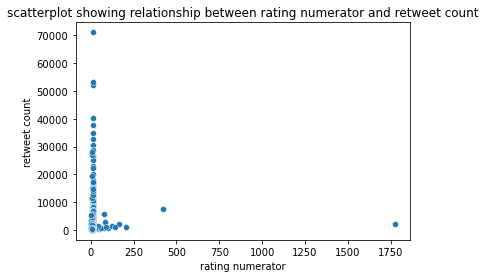

In [53]:
find_correlation(twitter_clean,'rating_numerator','retweet_count')

From the visualization above, the rating has to be scaled for a fair comparison

In [54]:
twitter_clean['scaled_rating'] = twitter_clean['rating_numerator'].div(twitter_clean['rating_denominator'])
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,scaled_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7054.0,33936.0,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5329.0,29420.0,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3503.0,22136.0,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7262.0,37057.0,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7804.0,35425.0,1.2


In [55]:
twitter_clean.query('scaled_rating == 177.6')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,scaled_rating
804,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2288.0,4800.0,177.6


Correlation between scaled rating and retweet count: 0.02167606587313921


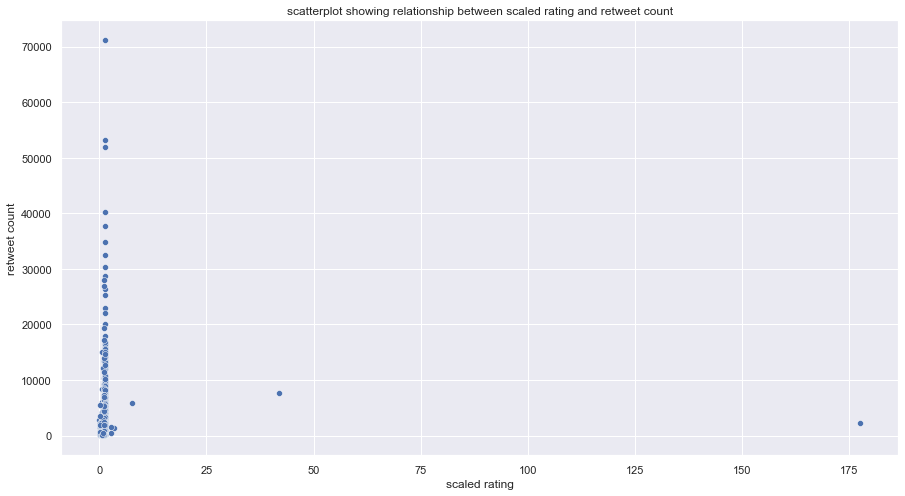

In [68]:
find_correlation(twitter_clean,'scaled_rating','retweet_count')

Even after scaling, it can be seen that there is no correlation between the ratings and retweet count

Rating vs Favorite Count

Correlation between scaled rating and favorite count: 0.020230332585012153


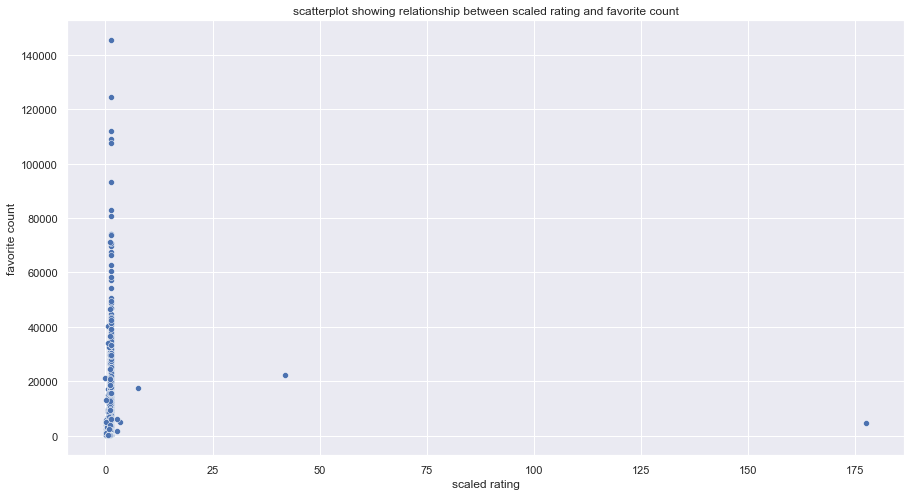

In [69]:
find_correlation(twitter_clean,'scaled_rating','favorite_count')

There is no correlation between the ratings and favorite count

##### Which dog type has the highest retweet or favorite count?

Dog type vs Retweet Count

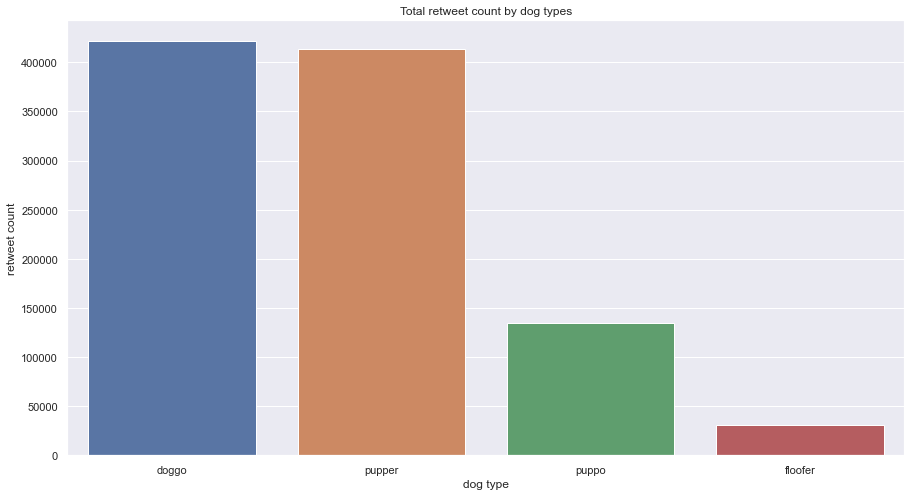

In [58]:
# join the twitter_master_archive data and the dog_type data together
new_df = twitter_clean.merge(dog_df, on='tweet_id')
compare_distributions('dog_type','retweet_count', new_df)

Doggo has the highest retweet count, followed closely by Pupper

Dog Type vs Favorite Count

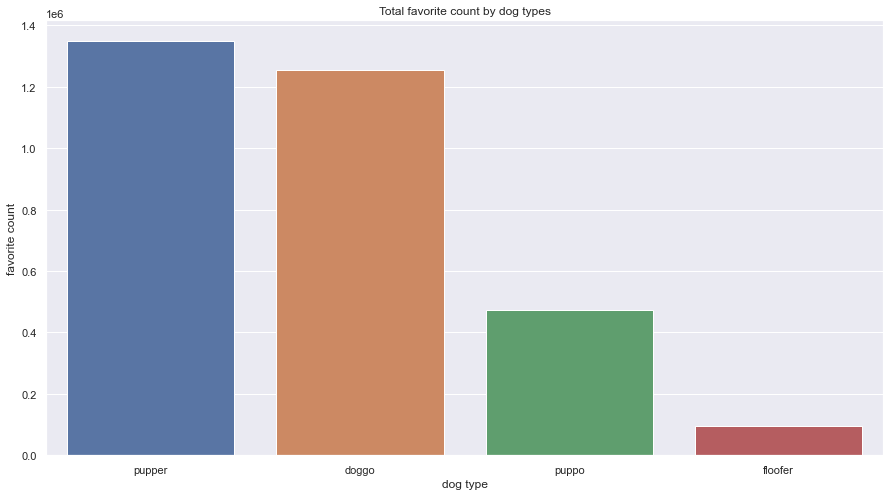

In [65]:
compare_distributions('dog_type','favorite_count', new_df)

Pupper has the highest favorite count, followed closely by doggo

##### Which dog breed has the highest retweet or favorite count?

Dog Breed vs Retweet Count

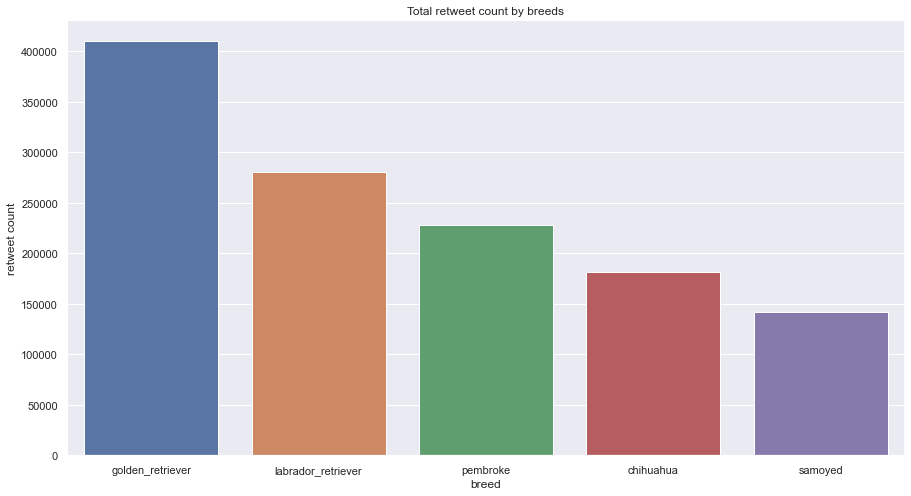

In [64]:
breed_df = twitter_clean.merge(image_clean[['tweet_id','p1']].rename(columns={'p1':'breed'}), on='tweet_id')
compare_distributions('breed','retweet_count', breed_df)

Dog Breed vs Favorite Count

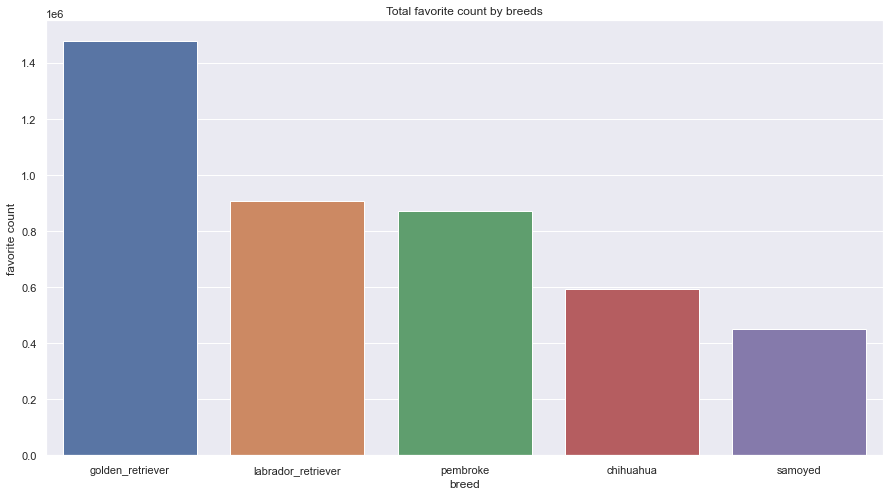

In [66]:
compare_distributions('breed','favorite_count', breed_df)

The distribution of retweet count and favorite count follow the same patterns for the dog breed. The golden retriever seems everyone's favorite.